In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter, AutoDateLocator
import matplotlib.dates as mdates

from datetime import datetime

In [99]:
#correspondence between sensor name and column number in maxigauge log file
sensor_map = {"P1":5, "P2":11, "P3":17, "P4":23, "P5":29, "P6":35}

## Function used to extract data
This function is used to return data from bluefors log files.
How to:
1. dates is an array of strings in the format of ['24-08-11'], same as how bluefors name it.
2. sensor is a string, it has to be one in the sensor_list defined in the function.
3. if you are trying to get data for sensors in sensor_list_1, no need to define column parameter. For data in maxigauge*.log, you can use the dictionary defined above, e.g., column = sensor_map["P1"].
4. The path to the log file is defined within the function, in the sentence start with "all_files = ", change it to your local path before use. 

In [100]:
def get_data(dates, sensor, column = 1):
    sensor_list_1 = ["CH1 P ", "CH1 R ", "CH1 T ", "CH2 P ", "CH2 R ", "CH2 T ", "CH5 P ", "CH5 R ", "CH5 T ", "CH6 P ", "CH6 R ", "CH6 T ", "CH7 P ", "CH7 R ", "CH7 T ", "Flowmeter "]
    sensor_list_2 = ["heaters_", "maxigauge "]
    if sensor in sensor_list_1:
        all_files = ["/mnt/c/Users/bxy48/Documents/BLUEFORS_LOG/{}/{}{}.log".format(date, sensor, date) for date in dates]
        df = pd.concat((pd.read_csv(f, header=None, names=['Date', 'Time', 'data']) for f in all_files), ignore_index=True)
        # Combine the date and time columns into a single datetime column
        df['Datetime'] = pd.to_datetime(df['Date'] + ',' + df['Time'], format=' %d-%m-%y,%H:%M:%S')
    elif sensor in sensor_list_2:
        all_files = ["/mnt/c/Users/bxy48/Documents/BLUEFORS_LOG/{}/{}{}.log".format(date, sensor, date) for date in dates]
        df = pd.concat((pd.read_csv(f, header=None, usecols = [0, 1, column], names=['Date', 'Time', 'data']) for f in all_files), ignore_index=True)
        # Combine the date and time columns into a single datetime column
        df['Datetime'] = pd.to_datetime(df['Date'] + ',' + df['Time'], format='%d-%m-%y,%H:%M:%S')
    else:
        print("The sensor name you give is not in the list, please try to use one of the followings:\n {}".format(sensor_list_1+sensor_list_2))
        return
            
    
    
    # Set the datetime column as the index
    df.set_index('Datetime', inplace=True)
    
    # Drop the original Date and Time columns
    df.drop(columns=['Date', 'Time'], inplace=True)

    return df['data']

In [101]:
def nice_date_axis():  #used to make the datetime look good in the x axis. 
    # Define custom formatter function
    def custom_date_format(x, pos):
        if pos == 0:
            return mdates.num2date(x).strftime('%y-%m-%d')
        else:
            return mdates.num2date(x).strftime('%H:%M')

    # Set up the custom date formatter
    formatter = plt.FuncFormatter(custom_date_format)
    plt.gca().xaxis.set_major_formatter(formatter)
    
    # Use AutoDateLocator to automatically adjust the date ticks
    locator = AutoDateLocator()
    plt.gca().xaxis.set_major_locator(locator)
    
    # Rotate the x-axis labels for better readability
    plt.gcf().autofmt_xdate()

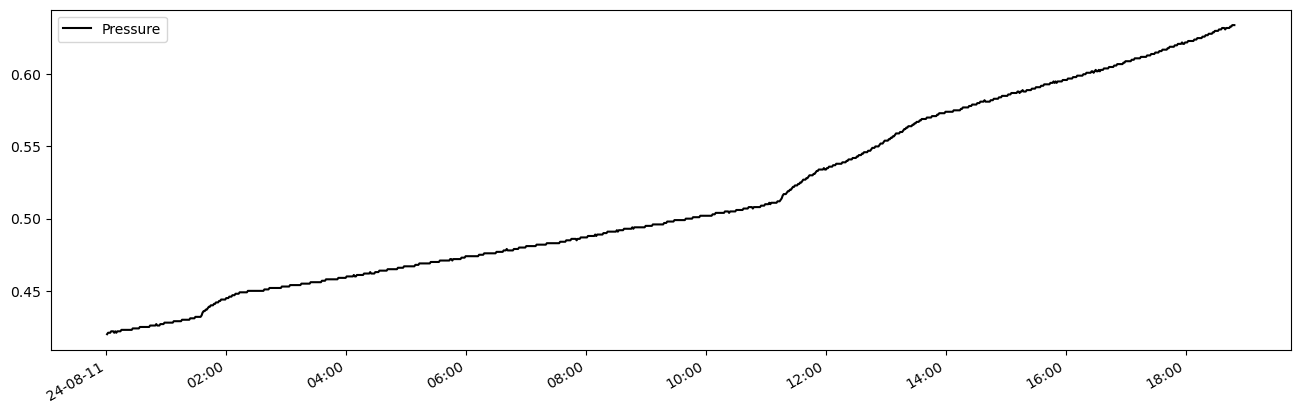

In [102]:
dates_to_plot = ['24-08-11']
sensor_to_plot = 'maxigauge '

data = get_data(dates_to_plot, sensor_to_plot, column = 35)

datetime_start = '08/11/24 11:45:00'
datetime_end = '08/11/24 18:42:00'
datetime_start = datetime.strptime(datetime_start, '%m/%d/%y %H:%M:%S')
datetime_end = datetime.strptime(datetime_end, '%m/%d/%y %H:%M:%S')

plot_range = True#(date>datetime_start)*(date<datetime_end)

fig, ax = plt.subplots(figsize = (16, 5))
        
ax.plot(date, data, label="Pressure", color = "k")
ax.legend()

nice_date_axis()

In [103]:
dates_to_plot = ['24-08-11']
sensor_to_plot = 'maxigauge '

P2 = get_data(dates_to_plot, sensor_to_plot, column = sensor_map["P2"])
P3 = get_data(dates_to_plot, sensor_to_plot, column = sensor_map["P3"])
P4 = get_data(dates_to_plot, sensor_to_plot, column = sensor_map["P4"])
P5 = get_data(dates_to_plot, sensor_to_plot, column = sensor_map["P5"])
flow = get_data(dates_to_plot, "Flowmeter ")

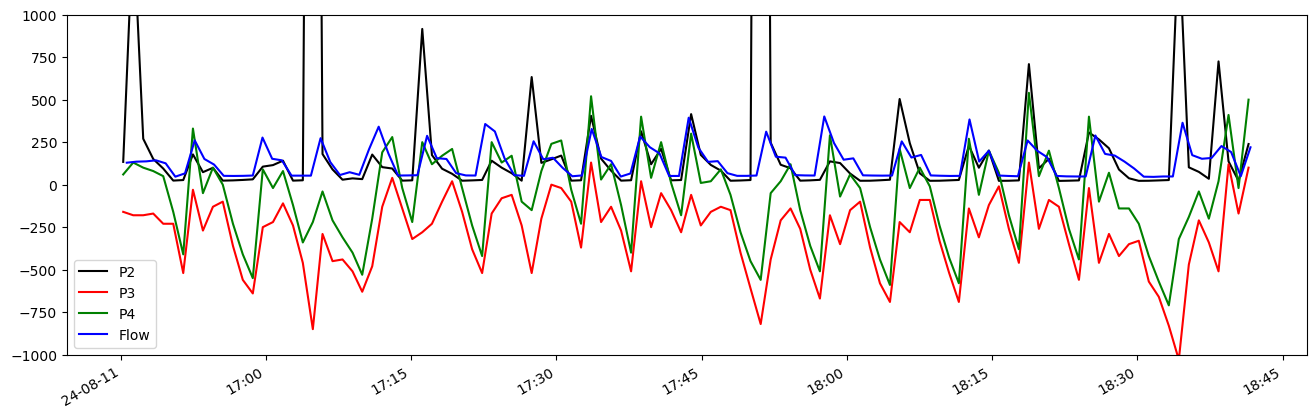

In [104]:
datetime_start = '08/11/24 16:45:00'
datetime_end = '08/11/24 18:42:00'
datetime_start = datetime.strptime(datetime_start, '%m/%d/%y %H:%M:%S')
datetime_end = datetime.strptime(datetime_end, '%m/%d/%y %H:%M:%S')

plot_range = (date>datetime_start)*(date<datetime_end)
flow_range = (flow.index>datetime_start)*(flow.index<datetime_end)

fig, ax = plt.subplots(figsize = (16, 5))
        
ax.plot(date[plot_range], P2[plot_range]*10000, label="P2", color = "k")
ax.plot(date[plot_range], (P3[plot_range]-350)*10, label="P3", color = "r")
ax.plot(date[plot_range], (P4[plot_range]-350)*10, label="P4", color = "g")
ax.plot(flow.index[flow_range], flow[flow_range]*400, label = "Flow", color = "b")
#ax.plot(date[plot_range], P5[plot_range], label="P5", color = "b")
ax.legend()
ax.set_ylim(-1000, 1000)

nice_date_axis()